In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST 

In [2]:
dataset = MNIST(root='datasets/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='datasets/', train=False)
len(test_dataset)

10000

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


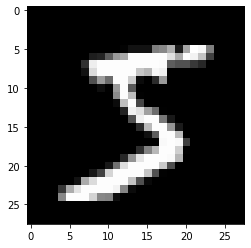

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [7]:
from torchvision.transforms import transforms

dataset = MNIST(root='datasets/',
               train=True,
               transform=transforms.ToTensor())

In [8]:
img_tensor, label = dataset[0]

print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [9]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


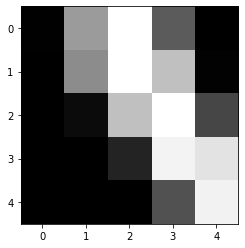

In [10]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [11]:
import numpy as np

def split_indices(n, val_pct):  #size of dataset, validation dataset percentage
    n_val = int(val_pct*n)
    indices = np.random.permutation(n)
    return indices[n_val:], indices[:n_val]

In [12]:
train_indices, val_indices = split_indices(len(dataset), 0.2)

In [13]:
print(len(train_indices), len(val_indices))
print('sample val indices: ', val_indices[:20])

48000 12000
sample val indices:  [56833  1524 27042  8377 53440 53006 31455 13632 24278 50751 39500 39256
 41436  7047  5756 42621 37709 10308 26538 10487]


In [14]:
from torch.utils.data import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [15]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler=val_sampler)

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0008, -0.0123,  0.0303,  ..., -0.0231,  0.0085,  0.0065],
        [-0.0123, -0.0061,  0.0338,  ..., -0.0352,  0.0247, -0.0342],
        [ 0.0284, -0.0195,  0.0254,  ..., -0.0170, -0.0254, -0.0066],
        ...,
        [ 0.0290, -0.0100, -0.0127,  ..., -0.0014,  0.0073, -0.0353],
        [ 0.0302,  0.0236, -0.0023,  ...,  0.0344, -0.0008,  0.0113],
        [-0.0191,  0.0253, -0.0320,  ..., -0.0174, -0.0257,  0.0022]],
       requires_grad=True)

In [18]:
# for images, labels in train_loader:
#     print(labels)
#     print(images.shape)
#     outputs = model(images)
#     break

In [19]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()        

In [20]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0192, -0.0301,  0.0257,  ...,  0.0325,  0.0152,  0.0243],
         [-0.0044,  0.0101,  0.0225,  ...,  0.0029, -0.0013, -0.0284],
         [-0.0242,  0.0321,  0.0061,  ...,  0.0087, -0.0105, -0.0283],
         ...,
         [ 0.0221,  0.0171, -0.0243,  ...,  0.0290, -0.0314, -0.0119],
         [ 0.0223, -0.0244,  0.0086,  ...,  0.0216, -0.0319,  0.0124],
         [ 0.0283,  0.0068,  0.0008,  ..., -0.0280,  0.0238,  0.0259]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0150,  0.0351,  0.0294, -0.0275, -0.0046, -0.0017, -0.0223, -0.0020,
         -0.0145,  0.0079], requires_grad=True)]

In [21]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('output shape: ', outputs.shape)
print('sample outputs: \n', outputs[:2].data)

output shape:  torch.Size([100, 10])
sample outputs: 
 tensor([[ 0.0051, -0.1095,  0.1660, -0.1472,  0.1532,  0.3504, -0.2616,  0.1947,
         -0.0400, -0.0877],
        [ 0.1028,  0.2045,  0.0298, -0.3235, -0.3089,  0.2064, -0.0456, -0.0193,
         -0.0708, -0.1620]])


In [22]:
import torch.nn.functional as F

In [23]:
probs = F.softmax(outputs, dim=1)

print("Sample Probabilities: \n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample Probabilities: 
 tensor([[0.0967, 0.0862, 0.1136, 0.0831, 0.1122, 0.1366, 0.0741, 0.1169, 0.0925,
         0.0881],
        [0.1134, 0.1256, 0.1054, 0.0741, 0.0751, 0.1258, 0.0978, 0.1004, 0.0953,
         0.0870]])
Sum:  1.0


In [24]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 5, 5, 1, 2, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 2, 5, 5,
        5, 5, 5, 5, 5, 5, 2, 1, 5, 5, 1, 1, 3, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 0, 9, 5, 5, 5, 5, 1, 5, 5, 4, 5, 1, 1, 5, 1, 5, 1, 2, 5, 5, 2, 5,
        2, 1, 5, 5, 9, 5, 5, 2, 5, 5, 1, 5, 5, 5, 5, 5, 9, 4, 5, 5, 2, 1, 5, 5,
        5, 1, 7, 5])
tensor([0.1366, 0.1258, 0.1422, 0.1324, 0.1396, 0.1296, 0.1578, 0.1515, 0.1406,
        0.1411, 0.1614, 0.1377, 0.1308, 0.1147, 0.1370, 0.1276, 0.1431, 0.1387,
        0.1351, 0.1350, 0.1556, 0.1232, 0.1620, 0.1607, 0.1174, 0.1485, 0.1352,
        0.1304, 0.1674, 0.1384, 0.1668, 0.1298, 0.1427, 0.1452, 0.1661, 0.1275,
        0.1298, 0.1569, 0.1403, 0.1329, 0.1587, 0.1823, 0.1686, 0.1544, 0.1569,
        0.1353, 0.1338, 0.1375, 0.1403, 0.1264, 0.1395, 0.1298, 0.1472, 0.1465,
        0.1572, 0.1337, 0.1456, 0.1647, 0.1403, 0.1202, 0.1424, 0.1270, 0.1224,
        0.1434, 0.1190, 0.1589, 0.1212, 0.1521, 0.1356, 0.1626, 0.1323, 0.1385,
        0.1341, 0.1

In [25]:
labels

tensor([9, 9, 6, 5, 5, 9, 5, 5, 6, 0, 6, 7, 5, 1, 9, 9, 5, 9, 8, 3, 5, 4, 7, 8,
        9, 4, 6, 6, 4, 6, 0, 6, 3, 9, 1, 1, 6, 2, 7, 6, 2, 5, 0, 5, 6, 9, 2, 0,
        3, 6, 4, 2, 3, 3, 9, 7, 3, 0, 6, 6, 4, 1, 8, 4, 4, 8, 9, 5, 4, 0, 3, 6,
        3, 7, 1, 2, 1, 5, 9, 6, 4, 3, 7, 9, 0, 8, 2, 3, 6, 6, 0, 0, 9, 4, 6, 0,
        4, 7, 0, 9])

In [26]:
def accuracy(l1, l2):
    return torch.sum(l1 == l2).item()/len(l1)

In [27]:
accuracy(preds, labels)

0.12

In [28]:
loss_fn = F.cross_entropy

In [29]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3569, grad_fn=<NllLossBackward>)


In [30]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_func(preds, yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [32]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                  for xb, yb in valid_dl]
        losses, nums, metrics = zip(*results)
        
        total = np.sum(nums)
        
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    
    return avg_loss, total, avg_metric

In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [34]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print(f'Loss: {val_loss}, Accuracy: {val_acc}')

Loss: 2.34049707253774, Accuracy: 0.14008333333333334


In [35]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)
            
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        if metric is None:
            print(f'Epoch [{epoch+1}/{epochs}] Loss: {val_loss}')
        else:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {val_loss}, {metric.__name__}: {val_metric}')

In [36]:
model = MnistModel() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [37]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.9117638349533081, accuracy: 0.6535
Epoch [2/5], Loss: 1.6020412355661393, accuracy: 0.75725
Epoch [3/5], Loss: 1.384222141901652, accuracy: 0.78825
Epoch [4/5], Loss: 1.2278799613316853, accuracy: 0.806
Epoch [5/5], Loss: 1.1120926668246587, accuracy: 0.81725


In [38]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0236639440059663, accuracy: 0.8244166666666667
Epoch [2/5], Loss: 0.9540367181102435, accuracy: 0.8318333333333333
Epoch [3/5], Loss: 0.8980131487051646, accuracy: 0.8363333333333334
Epoch [4/5], Loss: 0.8518275797367096, accuracy: 0.8395833333333333
Epoch [5/5], Loss: 0.8131103083491326, accuracy: 0.84225


In [39]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7802191237608592, accuracy: 0.8456666666666667
Epoch [2/5], Loss: 0.7518165146311124, accuracy: 0.84825
Epoch [3/5], Loss: 0.7270764688650767, accuracy: 0.8505
Epoch [4/5], Loss: 0.7052978043754895, accuracy: 0.8530833333333333
Epoch [5/5], Loss: 0.6858918190002441, accuracy: 0.855


In [40]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6685824250181516, accuracy: 0.8563333333333333
Epoch [2/5], Loss: 0.653020083407561, accuracy: 0.8579166666666667
Epoch [3/5], Loss: 0.6388893857598305, accuracy: 0.8595
Epoch [4/5], Loss: 0.6259952445824941, accuracy: 0.8625
Epoch [5/5], Loss: 0.6142262811462085, accuracy: 0.8635


In [41]:
test_dataset = MNIST(root='datasets/',
               train=False,
               transform=transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


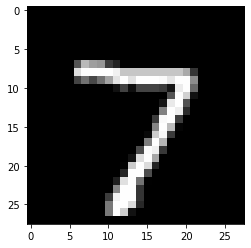

In [42]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print("Shape: ", img.shape)
print("Label: ", label)

In [43]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [44]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label:  7 Predicted:  7


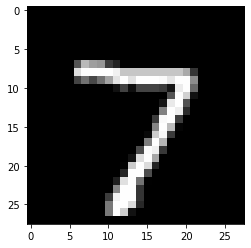

In [45]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print("Label: ", label, 'Predicted: ', predict_image(img, model))

Label:  0 Predicted:  0


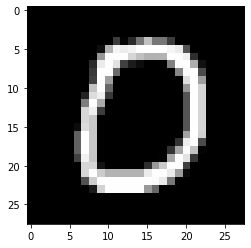

In [46]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print("Label: ", label, 'Predicted: ', predict_image(img, model))

Label:  8 Predicted:  8


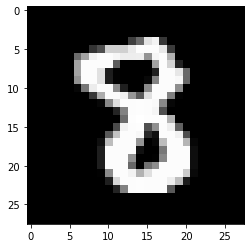

In [53]:
img, label = test_dataset[1893]
plt.imshow(img[0], cmap='gray')
print("Label: ", label, 'Predicted: ', predict_image(img, model))

Label:  2 Predicted:  8


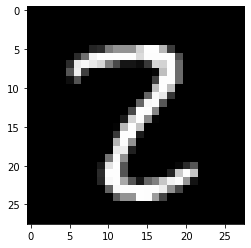

In [48]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print("Label: ", label, 'Predicted: ', predict_image(img, model)) # The logistic regression model fails here

In [49]:
test_loader = DataLoader(test_dataset, batch_size=200)
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print(f"Loss: ", {test_loss}, "Accuracy: ", {test_acc})

Loss:  {0.5976165449619293} Accuracy:  {0.8693}


In [50]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [52]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 3.2621e-02, -5.5357e-03, -2.5530e-02,  ..., -2.4965e-02,
                        2.2289e-03, -9.5500e-03],
                      [ 2.3205e-02,  1.1049e-02,  2.8062e-02,  ..., -1.1249e-03,
                        1.5936e-02,  2.0955e-02],
                      [ 2.7006e-03, -1.4490e-02,  2.7050e-02,  ...,  1.0522e-02,
                       -8.0585e-05,  2.4300e-02],
                      ...,
                      [-3.4212e-02, -1.7774e-02, -1.1565e-02,  ..., -4.8674e-03,
                        1.5116e-02,  1.6424e-02],
                      [ 2.6675e-02, -1.1375e-02,  3.0798e-02,  ...,  2.7910e-02,
                       -3.1786e-02,  3.1769e-03],
                      [ 6.3449e-03, -1.5174e-02, -1.1601e-02,  ..., -4.0739e-04,
                        1.2536e-02, -4.4621e-04]])),
             ('linear.bias',
              tensor([-0.0813,  0.1172, -0.0460, -0.0418,  0.0394,  0.0709, -0.0253,  0.0651,
                      -0.1357,